# Scalar fields

In [1]:
import giancarlo as gc

phi, phidag = gc.ScalarField(r'\phi')

op = lambda x: phidag(x) * phi(x)
expr = op('x') * op('y')

c = expr.wick()
c

( S_\phi(x, x)\,S_\phi(y, y) + S_\phi(x, y)\,S_\phi(y, x) )

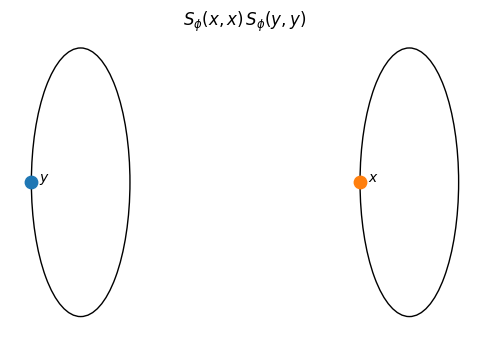

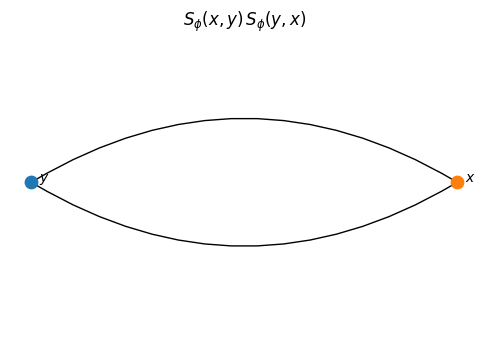

In [2]:
gc.PlotStyle.points['x'] = gc.PlotStyle.point(color='C1')
c.draw()

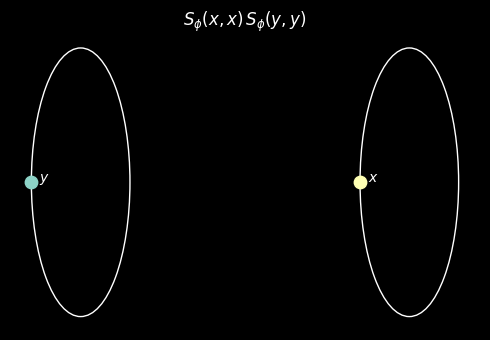

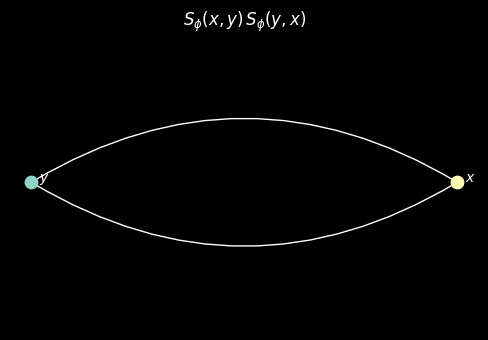

In [3]:
gc.PlotStyle.style = 'dark_background'
c.draw()

Generate random names for variables. Every time it is called it generates a new name. It is very useful for variables that are summed over

In [4]:
for _ in range(10):
    print(gc.default.var())

x1
x2
x3
x4
x5
x6
x7
x8
x9
x10


# Scalar QED

<IPython.core.display.Math object>

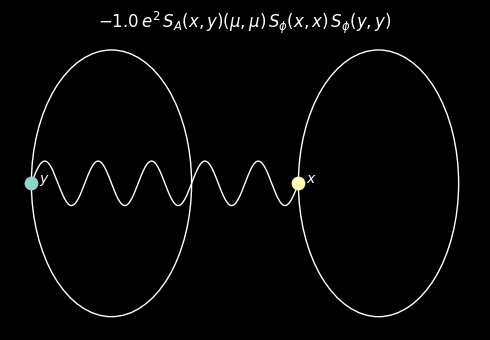

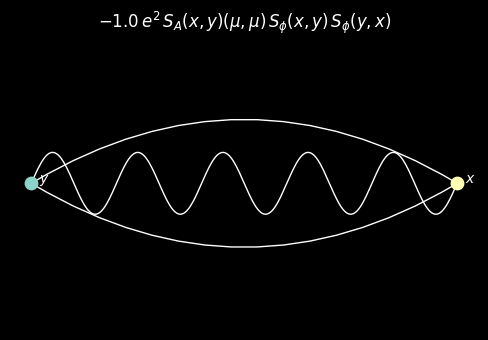

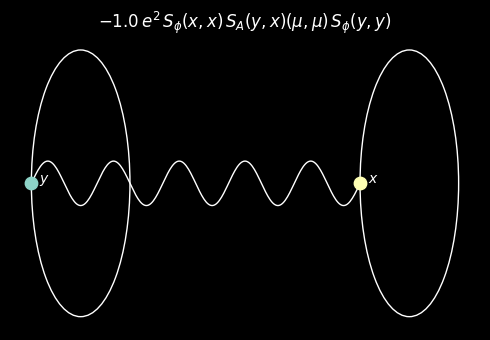

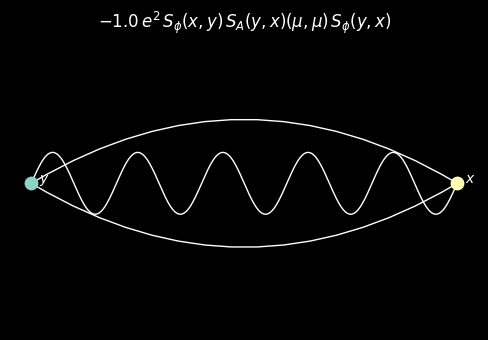

In [5]:
A = gc.PhotonField()

def Jgamma(x, mu):
    return gc.CNumber(-1j) * gc.Symbol('e') * phidag(x) * A(x,mu) * phi(x)

bubble = Jgamma('x',r'\mu') * Jgamma('y',r'\mu')
gc.log(bubble)

bubble.wick().draw()

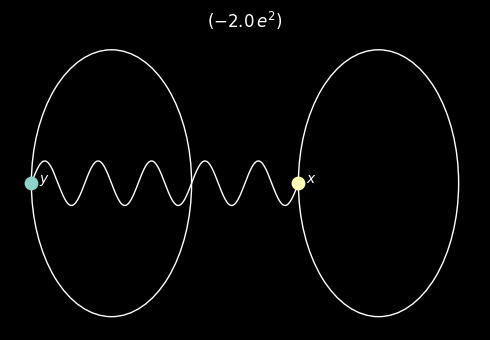

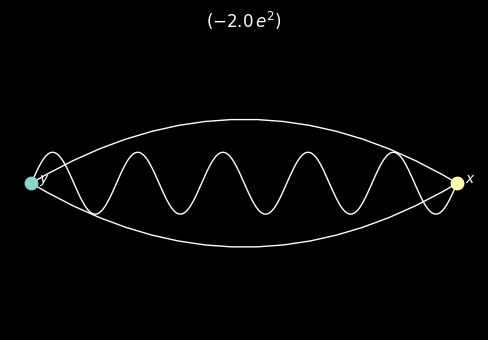

In [6]:
t = gc.Topologies(bubble.wick(), (0,2), (1,3))
t.draw()